In [1]:
import matplotlib.pyplot as plt
import numpy as np
# from tqdm.notebook import tqdm, trange
from tqdm import tqdm, trange, tqdm_notebook

In [2]:
%matplotlib inline

In [3]:
train_n = 100
test_n = 1000
d = 100

In [4]:
def generate_data():
    X_train = np.random.normal(0,1, size=(train_n,d))
    w_true = np.random.normal(0,1, size=(d,1))
    y_train = X_train.dot(w_true) + np.random.normal(0,0.5,size=(train_n,1))
    X_test = np.random.normal(0,1, size=(test_n,d))
    y_test = X_test.dot(w_true) + np.random.normal(0,0.5,size=(test_n,1))
    return w_true, X_train, y_train, X_test, y_test

# 3.1

In [5]:
def normalized_error(X, y, w):
    return np.sqrt(np.sum((X @ w - y) ** 2) / np.sum(y ** 2))

f_hat_train, f_hat_test = [], []
for t in range(10):
    _, X_train, y_train, X_test, y_test = generate_data()
    w = np.linalg.inv(X_train) @ y_train
    f_hat_train.append(normalized_error(X_train, y_train, w))
    f_hat_test.append(normalized_error(X_test, y_test, w))

print(f"Normalized train error (linalg soln): {np.mean(f_hat_train):.5e}")
print(f"Normalized test error (linalg soln): {np.mean(f_hat_test):.5e}")

Normalized train error (linalg soln): 7.37206e-14
Normalized test error (linalg soln): 2.03376e+00


# 3.2

100%|██████████| 10/10 [00:00<00:00, 156.22it/s]

Normalized train error (L2 linalg soln): [3.88951187e-04 1.65428837e-03 4.18708652e-03 1.35805258e-02
 6.46753694e-02 2.81939965e-01 7.35487767e-01]
Normalized test error (L2 linalg soln): [0.55604423 0.36827449 0.25291799 0.21570124 0.30491481 0.55105611
 0.85336329]


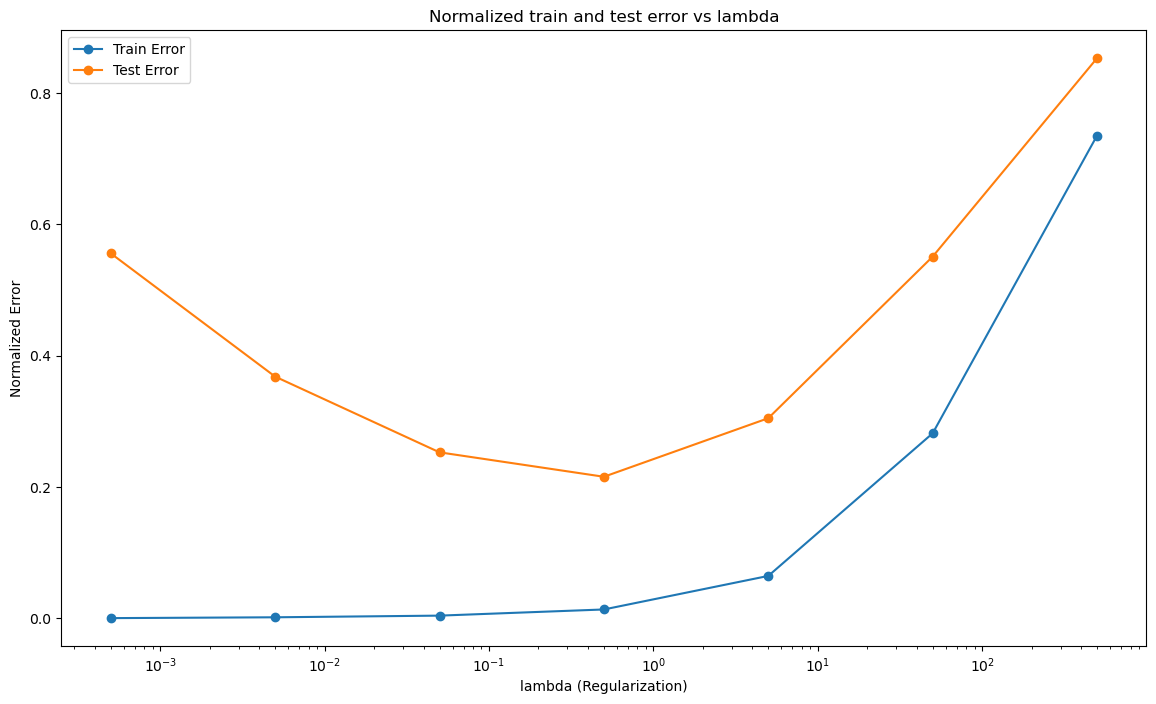

In [6]:
n_trials = 10
l_reg_list = [0.0005, 0.005, 0.05, 0.5, 5, 50, 500]
avg_f_hat_train_per_l, avg_f_hat_test_per_l = [0.0]* len(l_reg_list), [0.0]* len(l_reg_list)
    
for t in trange(n_trials):
    w_true, X_train, y_train, X_test, y_test = generate_data()

    for l_idx, l_reg in enumerate(l_reg_list):
        w = np.linalg.inv(X_train.T @ X_train + l_reg * np.identity(X_train.shape[1])) @ X_train.T @ y_train
        avg_f_hat_train_per_l[l_idx] += normalized_error(X_train, y_train, w)
        avg_f_hat_test_per_l[l_idx] += normalized_error(X_test, y_test, w)

avg_f_hat_train_per_l = np.array(avg_f_hat_train_per_l) / n_trials
avg_f_hat_test_per_l = np.array(avg_f_hat_test_per_l) / n_trials

fig, axs = plt.subplots()
fig.set_size_inches(14, 8)
axs.plot(l_reg_list, avg_f_hat_train_per_l, marker='o', label='Train Error')
axs.plot(l_reg_list, avg_f_hat_test_per_l, marker='o', label='Test Error')
axs.set_xscale('log')
axs.set_xlabel('lambda (Regularization)')
axs.set_ylabel('Normalized Error')
axs.set_title('Normalized train and test error vs lambda')
axs.legend()

print(f"Normalized train error (L2 linalg soln): {avg_f_hat_train_per_l}")
print(f"Normalized test error (L2 linalg soln): {avg_f_hat_test_per_l}")

# Test error is greater than train error. As the lambda gradually increases, the test error goes down and then increases.
# The test error of L2 regularization outperforms the test error without any regularization, but the train error is reversed. 
# Without any regularization, the model is at risk of overfitting.

# 3.3

In [7]:
def sgd(X, y, w, step_size, n_steps):
    for _ in trange(n_steps):
        i = np.random.randint(X.shape[0])
        gradient = 2 * (w.T @ X[i].reshape(-1, 1) - y[i]) * X[i].reshape(-1, 1)
        w = w - step_size * gradient
    return w

In [8]:
n_trials = 10
n_steps = 1000000
step_size_list = [5e-5, 5e-4, 5e-3]
avg_f_hat_train_per_ss, avg_f_hat_test_per_ss = [0.0]* len(step_size_list), [0.0]* len(step_size_list)
    
for t in trange(n_trials, desc="Trail #"):
    w_true, X_train, y_train, X_test, y_test = generate_data()

    for ss_idx, step_size in enumerate(step_size_list):
        w = np.zeros((X_train.shape[1], 1))
        w = sgd(X_train, y_train, w, step_size, n_steps)
        avg_f_hat_train_per_ss[ss_idx] += normalized_error(X_train, y_train, w)
        avg_f_hat_test_per_ss[ss_idx] += normalized_error(X_test, y_test, w)

avg_f_hat_train_per_ss = np.array(avg_f_hat_train_per_ss) / n_trials
avg_f_hat_test_per_ss = np.array(avg_f_hat_test_per_ss) / n_trials

print(f"Normalized train error (SGD): {avg_f_hat_train_per_ss}")
print(f"Normalized test error (SGD): {avg_f_hat_test_per_ss}")

Trail #: 100%|██████████| 10/10 [07:33<00:00, 45.33s/it]

Normalized train error (SGD): [0.01566128 0.00673015 0.00451215]
Normalized test error (SGD): [0.25799275 0.28805797 0.45570946]


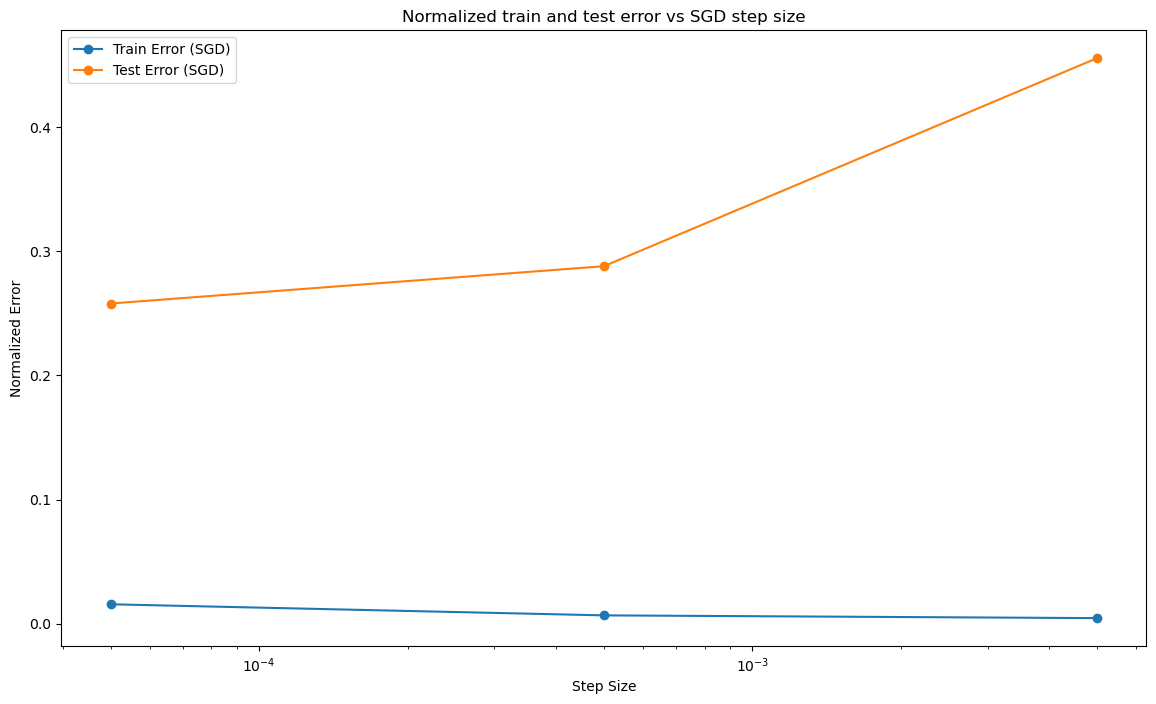

In [9]:
fig, axs = plt.subplots()
fig.set_size_inches(14, 8)
axs.plot(step_size_list, avg_f_hat_train_per_ss, marker='o', label='Train Error (SGD)')
axs.plot(step_size_list, avg_f_hat_test_per_ss, marker='o', label='Test Error (SGD)')
axs.set_xscale('log')
axs.set_xlabel('Step Size')
axs.set_ylabel('Normalized Error')
axs.set_title('Normalized train and test error vs SGD step size')
axs.legend()
# The test error of SGD outperforms the test error of without regularization, but the train error is reversed.
# SGD act like regularizers because of noisy update and learning rate decay.

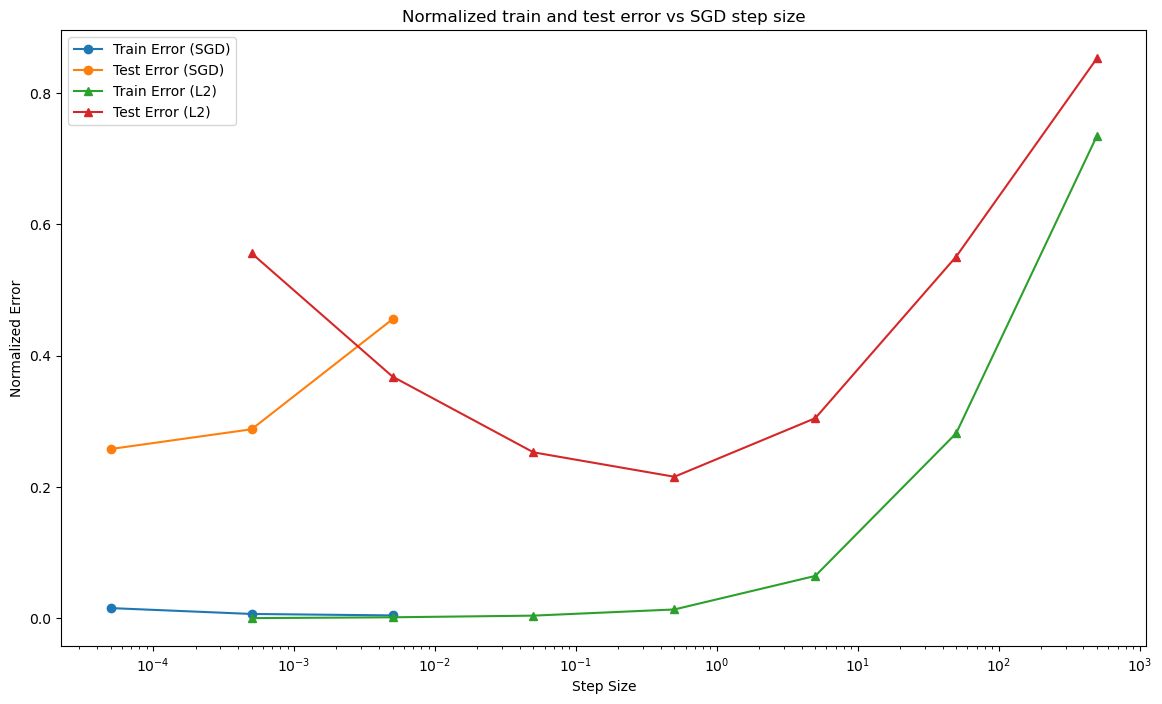

In [10]:
fig, axs = plt.subplots()
fig.set_size_inches(14, 8)
axs.plot(step_size_list, avg_f_hat_train_per_ss, marker='o', label='Train Error (SGD)')
axs.plot(step_size_list, avg_f_hat_test_per_ss, marker='o', label='Test Error (SGD)')
axs.plot(l_reg_list, avg_f_hat_train_per_l, marker='^', label='Train Error (L2)')
axs.plot(l_reg_list, avg_f_hat_test_per_l, marker='^', label='Test Error (L2)')
axs.set_xscale('log')
axs.set_xlabel('Step Size')
axs.set_ylabel('Normalized Error')
axs.set_title('Normalized train and test error vs SGD step size')
axs.legend()

# 3.4

In [11]:
def sgd_w_tracking(X, y, X_te, y_te, w, step_size, n_steps, eval_every=100):
    train_errs, test_errs, w_norms = [], [], []
    print(f"Step size: {step_size}")
    for step_ctr in trange(n_steps, desc="SGD iteration"):
        i = np.random.randint(X.shape[0])
        gradient = 2 * (w.T @ X[i].reshape(-1, 1) - y[i]) * X[i].reshape(-1, 1)
        w = w - step_size * gradient
        train_errs.append(normalized_error(X, y, w))
        if step_ctr == 0 or (step_ctr + 1) % eval_every == 0:
            test_errs.append(normalized_error(X_te, y_te, w))
        w_norms.append(np.sqrt(np.sum(w ** 2)))
    return w, train_errs, test_errs, w_norms

In [12]:
n_steps = 1000000
step_size_list = [5e-5, 5e-3]
f_hat_train_trend_per_ss, f_hat_test_trend_per_ss, w_norm_trend = [None]* len(step_size_list), [None]* len(step_size_list), [None]* len(step_size_list)
f_hat_train_true, f_hat_test_true = [], []
    
w_true, X_train, y_train, X_test, y_test = generate_data()
f_hat_train_true = normalized_error(X_train, y_train, w_true)
f_hat_test_true = normalized_error(X_test, y_test, w_true)

for ss_idx, step_size in enumerate(step_size_list):
    w = np.zeros((X_train.shape[1], 1))
    w, train_errors, test_errors, w_est_norms = sgd_w_tracking(X_train, y_train, X_test, y_test, w, step_size, n_steps)

    f_hat_train_trend_per_ss[ss_idx] = train_errors
    f_hat_test_trend_per_ss[ss_idx] = test_errors
    w_norm_trend[ss_idx] = w_est_norms

Step size: 5e-05


SGD iteration: 100%|██████████| 1000000/1000000 [00:39<00:00, 25184.74it/s]


Step size: 0.005


SGD iteration: 100%|██████████| 1000000/1000000 [00:39<00:00, 25602.28it/s]


### 3.4 (i)

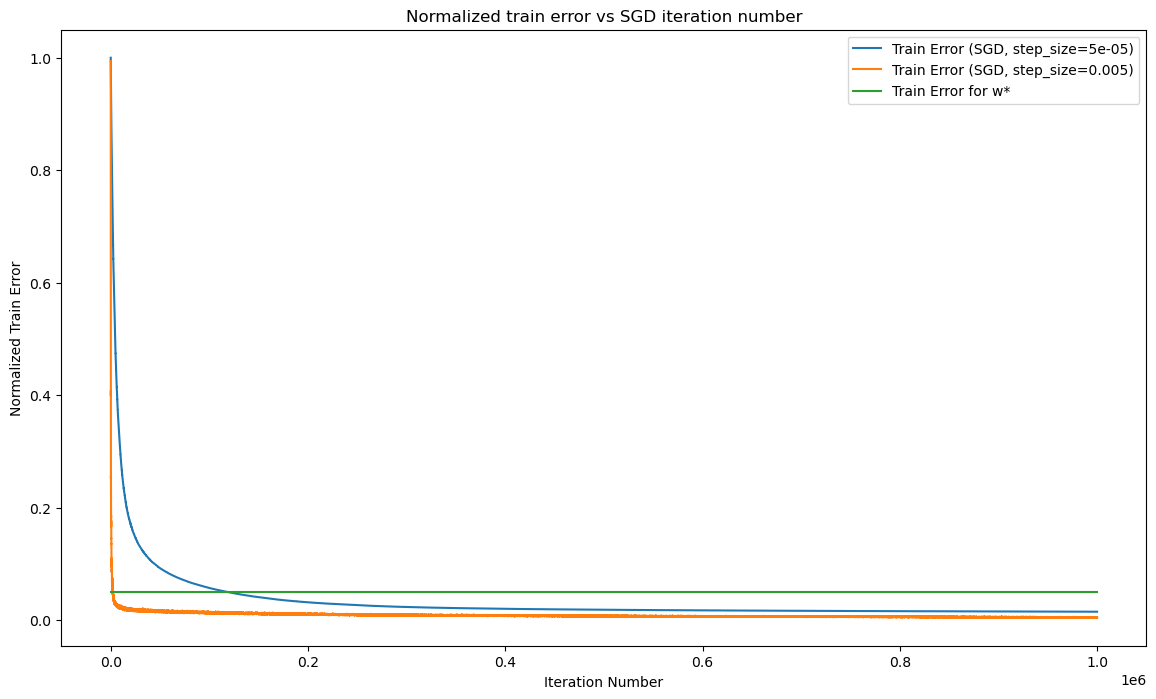

In [13]:
fig, axs = plt.subplots()
fig.set_size_inches(14, 8)
for ss_idx, step_size in enumerate(step_size_list):
    axs.plot(np.arange(1000000), f_hat_train_trend_per_ss[ss_idx],
             label=f'Train Error (SGD, step_size={step_size})')

axs.plot([0, 1000000], [f_hat_train_true, f_hat_train_true], label='Train Error for w*')

axs.set_xlabel('Iteration Number')
axs.set_ylabel('Normalized Train Error')
axs.set_title('Normalized train error vs SGD iteration number')
axs.legend()

### 3.4 (ii)

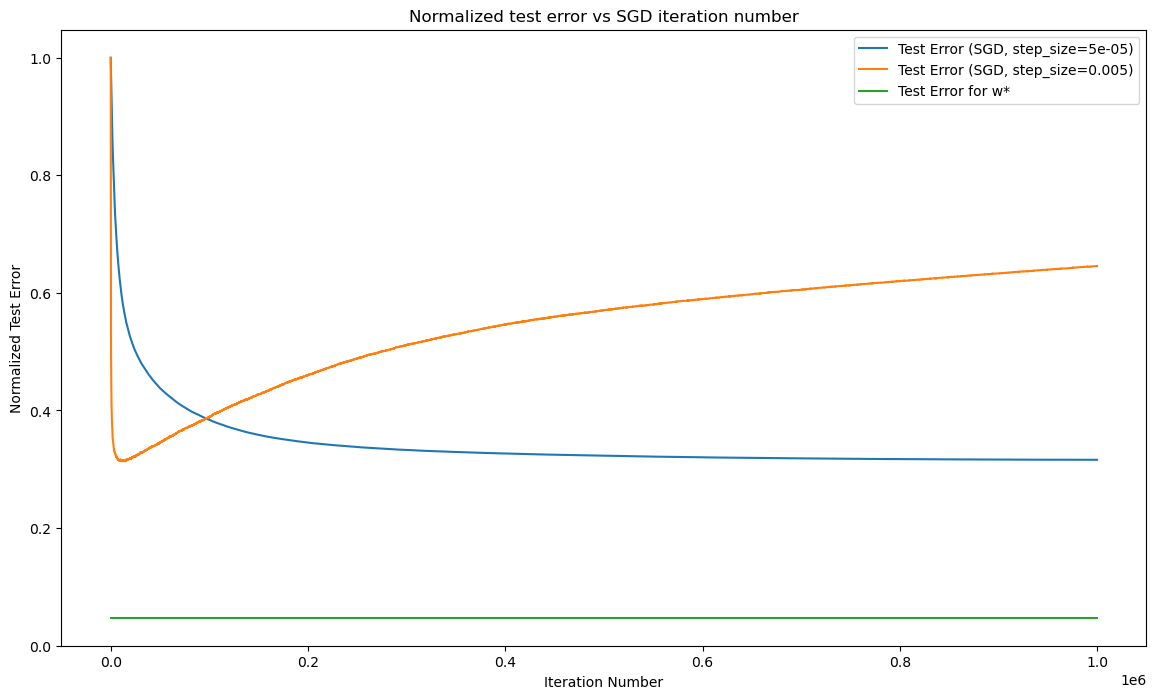

In [14]:
fig, axs = plt.subplots()
fig.set_size_inches(14, 8)
for ss_idx, step_size in enumerate(step_size_list):
    axs.plot(np.arange(1000001, step=100), f_hat_test_trend_per_ss[ss_idx],
             label=f'Test Error (SGD, step_size={step_size})')

axs.plot([0, 1000000], [f_hat_test_true, f_hat_test_true], label='Test Error for w*')

axs.set_xlabel('Iteration Number')
axs.set_ylabel('Normalized Test Error')
axs.set_title('Normalized test error vs SGD iteration number')
axs.legend()

### 3.4 (iii)

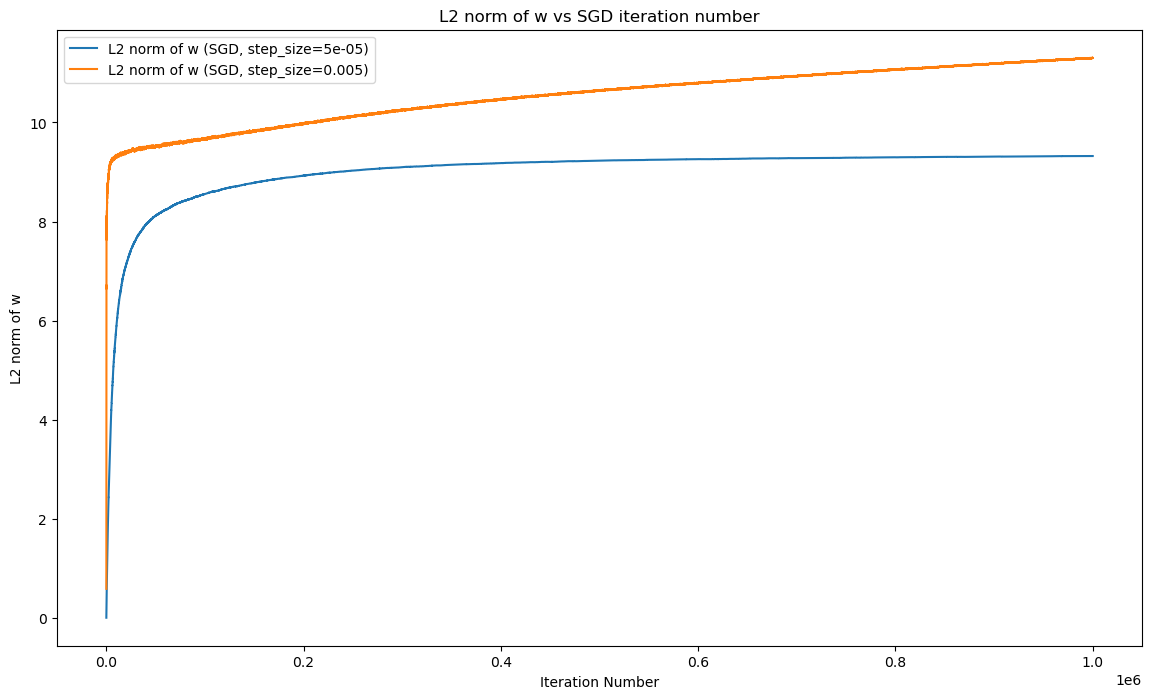

In [15]:
fig, axs = plt.subplots()
fig.set_size_inches(14, 8)
for ss_idx, step_size in enumerate(step_size_list):
    axs.plot(np.arange(1000000), w_norm_trend[ss_idx],
             label=f'L2 norm of w (SGD, step_size={step_size})')

axs.set_xlabel('Iteration Number')
axs.set_ylabel('L2 norm of w')
axs.set_title('L2 norm of w vs SGD iteration number')
axs.legend()

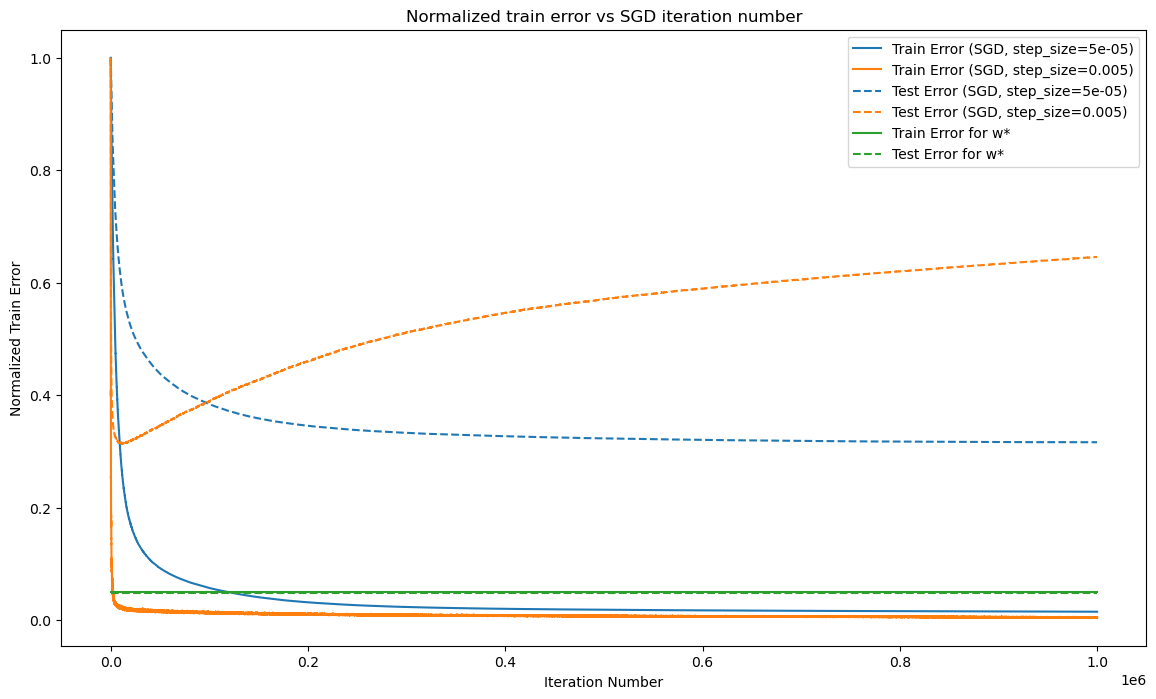

In [16]:
fig, axs = plt.subplots()
fig.set_size_inches(14, 8)
for ss_idx, step_size in enumerate(step_size_list):
    axs.plot(np.arange(1000000), f_hat_train_trend_per_ss[ss_idx], f'C{ss_idx}',
             label=f'Train Error (SGD, step_size={step_size})')

for ss_idx, step_size in enumerate(step_size_list):
    axs.plot(np.arange(1000001, step=100), f_hat_test_trend_per_ss[ss_idx], f'C{ss_idx}--',
             label=f'Test Error (SGD, step_size={step_size})')

axs.plot([0, 1000000], [f_hat_train_true, f_hat_train_true], 'C2', label='Train Error for w*')
axs.plot([0, 1000000], [f_hat_test_true, f_hat_test_true], 'C2--', label='Test Error for w*')

axs.set_xlabel('Iteration Number')
axs.set_ylabel('Normalized Train Error')
axs.set_title('Normalized train error vs SGD iteration number')
axs.legend()

# Generalization ability with different steps:
# On the training set, different step sizes all have good generalization ability, but on the test set, a big step size leads to higher error.
# Overfit when training error becomes too small:
# When the step size is relatively small, the model may still not overfit even though the error rate on the training set is already small. 
# However, when the step size is large, the model has a higher likelihood of overfitting if the error rate on the training set is small.
# Generalization ability with l2 norm:
# It can be seen that the l2 norm grows after iterations, but after reaching a relatively small value the growth becomes extremely slow. 
# A small l2 norm means that the model has good generalization.

# 3.5

In [27]:
def initialize_weights(d, r):
    if r == 0:
        return np.zeros(d).reshape(d, 1)
    else:
        w = np.random.randn(d).reshape(d, 1)
        # w = np.random.normal(0, 1, size=(d, 1))
        w_norm = np.linalg.norm(w)
        return (w / w_norm) * r

In [30]:
n_trials = 10
r_list = [0, 0.1, 0.5, 1, 10, 20, 30]
step_size = 0.00005
n_steps = 1000000
avg_f_hat_train_per_r, avg_f_hat_test_per_r, w_norm_per_r = [0.0]* len(r_list), [0.0]* len(r_list), [0.0]* len(r_list)
    
for t in trange(n_trials, desc="Trail #"):
    w_true, X_train, y_train, X_test, y_test = generate_data()
    for r_idx, r in enumerate(r_list):
        w = initialize_weights(X_train.shape[1], r)
        w = sgd(X_train, y_train, w, step_size, n_steps)
        avg_f_hat_train_per_r[r_idx] += normalized_error(X_train, y_train, w)
        avg_f_hat_test_per_r[r_idx] += normalized_error(X_test, y_test, w)
        w_norm_per_r[r_idx] += np.sqrt(np.sum(w ** 2))
    
avg_f_hat_train_per_r = np.array(avg_f_hat_train_per_r) / n_trials
avg_f_hat_test_per_r = np.array(avg_f_hat_test_per_r) / n_trials
w_norm_per_r = np.array(w_norm_per_r) / n_trials

print(f"Normalized train error (SGD): {avg_f_hat_train_per_r}")
print(f"Normalized test error (SGD): {avg_f_hat_test_per_r}")

Trail #: 100%|██████████| 10/10 [17:40<00:00, 106.05s/it]


Normalized train error (SGD): [0.01464884 0.01465723 0.0145712  0.01478888 0.01632941 0.0265503
 0.03151314]
Normalized test error (SGD): [0.23883863 0.23896153 0.23836105 0.24288567 0.30653049 0.47488753
 0.64864869]


Normalized train error (SGD): [0.01464884 0.01465723 0.0145712  0.01478888 0.01632941 0.0265503
 0.03151314]
Normalized test error (SGD): [0.23883863 0.23896153 0.23836105 0.24288567 0.30653049 0.47488753
 0.64864869]


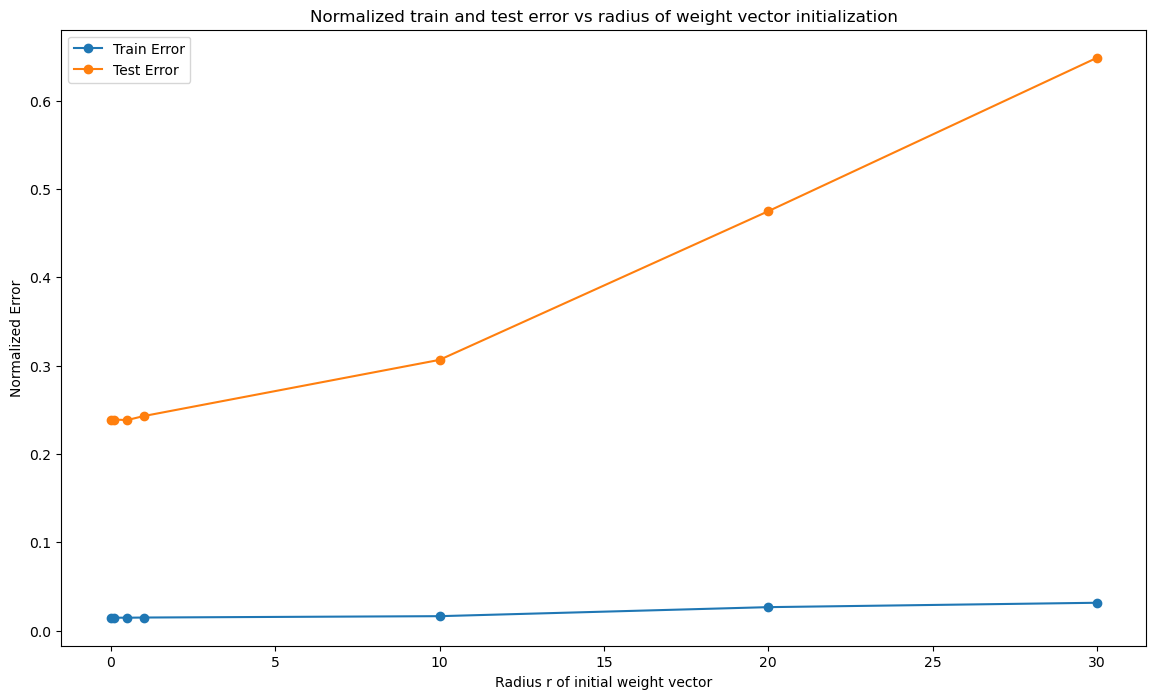

In [31]:
fig, axs = plt.subplots()
fig.set_size_inches(14, 8)
axs.plot(r_list, avg_f_hat_train_per_r, marker='o', label='Train Error')
axs.plot(r_list, avg_f_hat_test_per_r, marker='o', label='Test Error')

axs.set_xlabel('Radius r of initial weight vector')
axs.set_ylabel('Normalized Error')
axs.set_title('Normalized train and test error vs radius of weight vector initialization')
axs.legend()

print(f"Normalized train error (SGD): {avg_f_hat_train_per_r}")
print(f"Normalized test error (SGD): {avg_f_hat_test_per_r}")

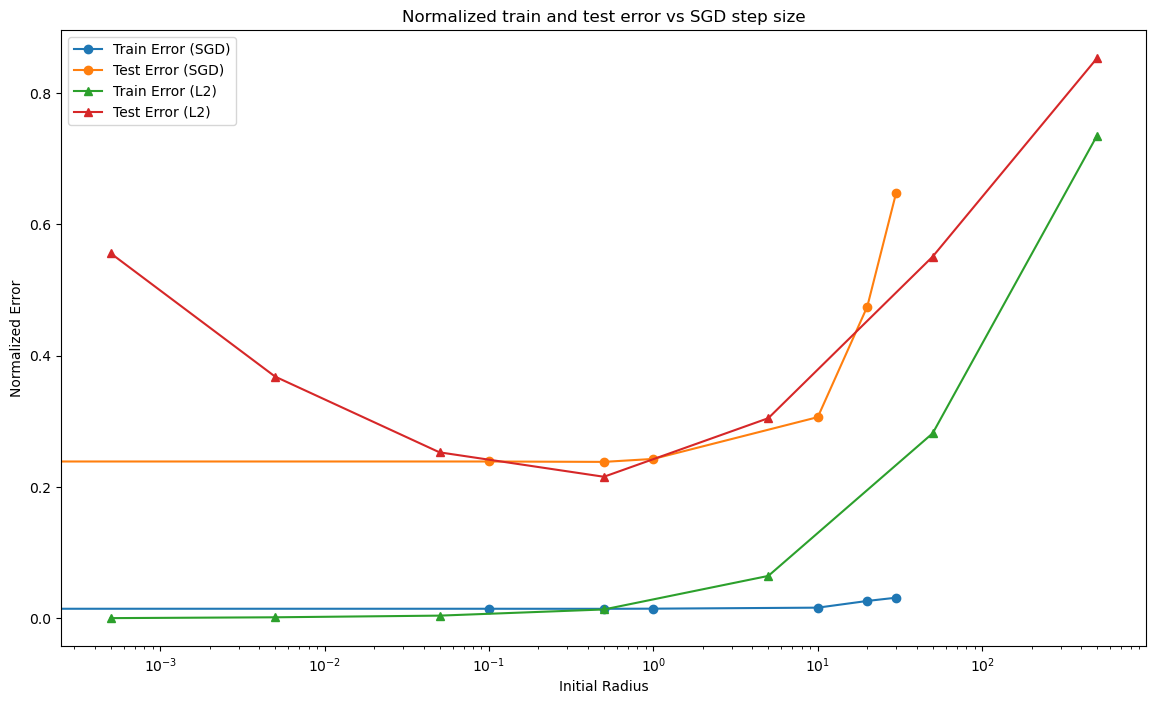

In [32]:
fig, axs = plt.subplots()
fig.set_size_inches(14, 8)
axs.plot(r_list, avg_f_hat_train_per_r, marker='o', label='Train Error (SGD)')
axs.plot(r_list, avg_f_hat_test_per_r, marker='o', label='Test Error (SGD)')
axs.plot(l_reg_list, avg_f_hat_train_per_l, marker='^', label='Train Error (L2)')
axs.plot(l_reg_list, avg_f_hat_test_per_l, marker='^', label='Test Error (L2)')
axs.set_xscale('log')
axs.set_xlabel('Initial Radius')
axs.set_ylabel('Normalized Error')
axs.set_title('Normalized train and test error vs SGD step size')
axs.legend()